backend: <IBMBackend('ibm_hanoi')>
0: ─╭|Ψ⟩─┤ ╭Probs
1: ─├|Ψ⟩─┤ ├Probs
2: ─├|Ψ⟩─┤ ├Probs
3: ─╰|Ψ⟩─┤ ╰Probs


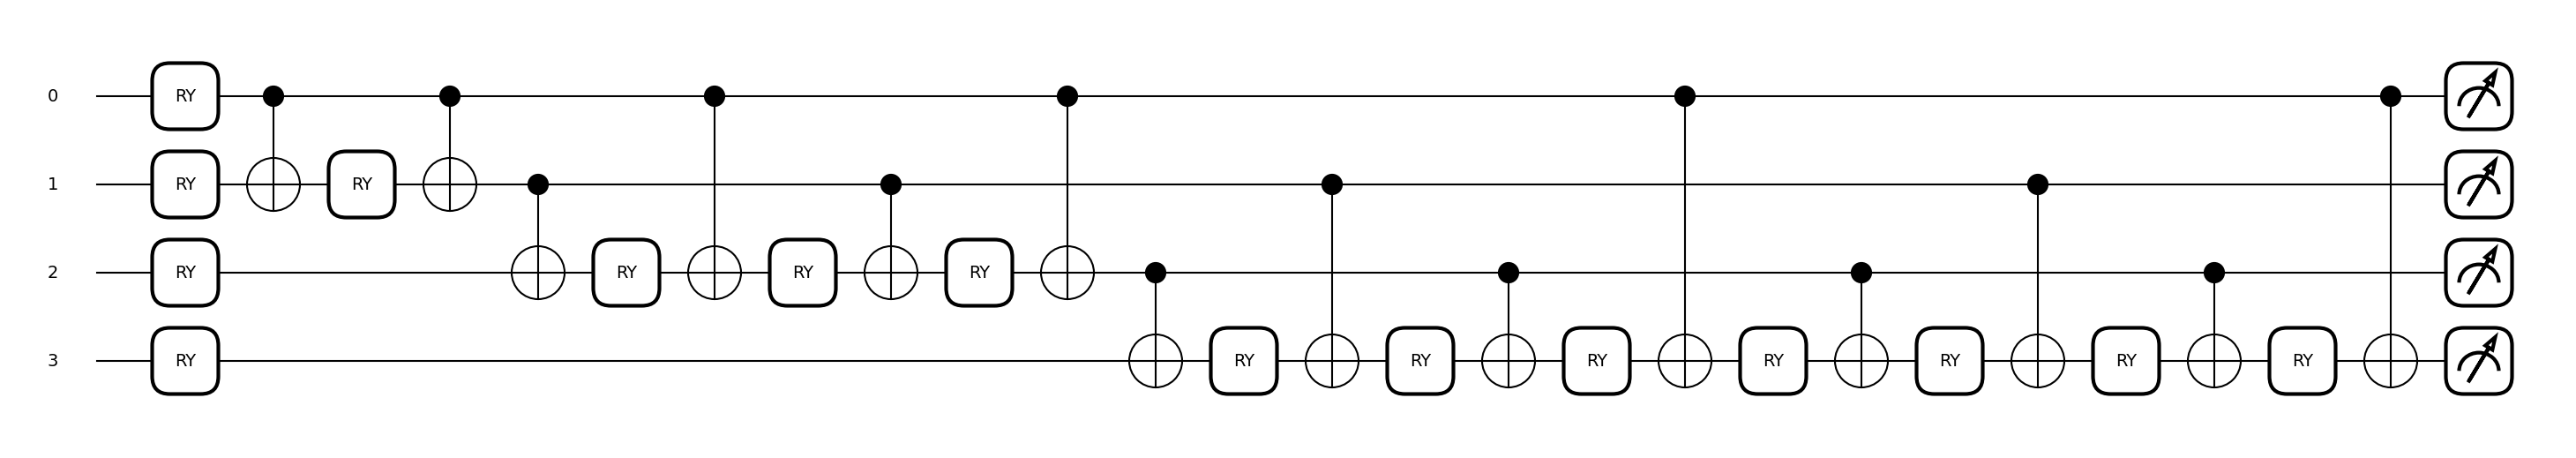

' \nnq  nPix  cx-depth\n3    8     6\n4    16   14\n5    32   30\n'

In [19]:
# Issue: see transpiled circuit for real IBM HW
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# .... input data
num_wires = 4
X=np.random.rand(2 ** num_wires)
X/=np.linalg.norm(X)

#.... select  backend
shots=1000
if 0:
    from qiskit_ibm_provider import IBMProvider
    provider = IBMProvider()
    backend = provider.get_backend('ibm_hanoi')
    dev = qml.device('qiskit.ibmq', wires=num_wires, backend=backend, shots=shots)
else:
    dev = qml.device('default.qubit', wires=num_wires, shots=shots)
    
#.... ideal circuit
def encoder( features):
    wires = list(range(num_wires))
    qml.AmplitudeEmbedding(features=features, wires=wires, pad_with=0.5, normalize=True)
    return qml.probs(wires=wires)

qnode = qml.QNode(encoder, dev)
print('backend:',backend)
print(qml.draw(qnode)(X)) 

#.... ideal circuit transpiled for to standard gates
circ1 = qml.compile(encoder, basis_set=["CNOT", "RX", "RY", "RZ"], num_passes=2)
fig, ax = qml.draw_mpl(circ1)( X); plt.show()

''' 
nq  nPix  cx-depth
3    8     6
4    16   14
5    32   30
'''

In [20]:
probTens = qnode(X)

In [21]:
print("Probability of each computational basis state:")
for state, prob in enumerate(probTens):
    print("State %2d=%s  prob=%.3f"%(state,format(state, '04b'),prob))

Probability of each computational basis state:
State  0=0000  prob=0.005
State  1=0001  prob=0.001
State  2=0010  prob=0.136
State  3=0011  prob=0.019
State  4=0100  prob=0.077
State  5=0101  prob=0.089
State  6=0110  prob=0.003
State  7=0111  prob=0.103
State  8=1000  prob=0.143
State  9=1001  prob=0.127
State 10=1010  prob=0.001
State 11=1011  prob=0.062
State 12=1100  prob=0.000
State 13=1101  prob=0.147
State 14=1110  prob=0.003
State 15=1111  prob=0.084


In [23]:
dev._current_job.job_id

AttributeError: 'DefaultQubit' object has no attribute '_current_job'